In [621]:
import quandl
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

%matplotlib inline


In [622]:
# df9.to_pickle('mortunempcpihpi.p')
df9 = pd.read_pickle('mortunempcpihpi.p')

Index(['HPIUS', 'month', 'year', 'mortgrate', 'unemp', 'cpi'], dtype='object')

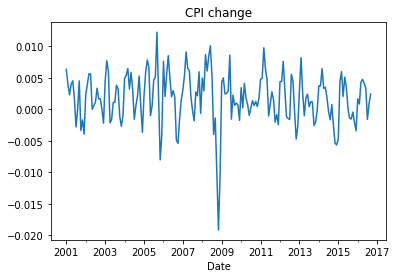

In [623]:
df9.cpi.plot(title = 'CPI change')
df9.columns

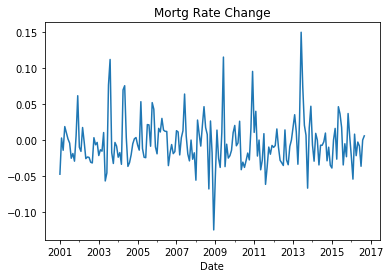

In [147]:
df9.mortgrate.plot(title = 'Mortg Rate Change')

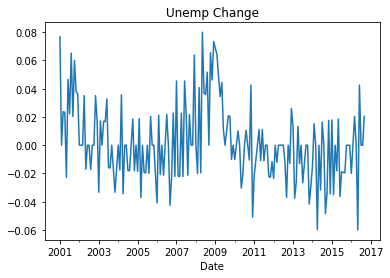

In [139]:
df9.unemp.plot(title = 'Unemp Change')


In [624]:
import statsmodels.api as sm
X = df9[[ 'mortgrate', 'unemp', 'cpi']]
y = df9['HPIUS']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HPIUS   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     7.756
Date:                Sun, 08 Apr 2018   Prob (F-statistic):           6.60e-05
Time:                        16:16:16   Log-Likelihood:                 700.69
No. Observations:                 189   AIC:                            -1393.
Df Residuals:                     185   BIC:                            -1380.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.000      5.796      0.000       0.002       0.004
mortgrate      0.0229      0.013      1.712      0.089      -0.004       0.049
unemp         -0.0681      0.016     -4.150      0.000      -0.100      -0.036
cpi            0.0424      0.112      0.379      0.705      -0.178       0.263
==============================================================================
Omnibus:                       14.644   Durbin-Watson:                   0.208
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.212
Skew:                          -0.614   Prob(JB):                     0.000820
Kurtosis:                       2.457   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

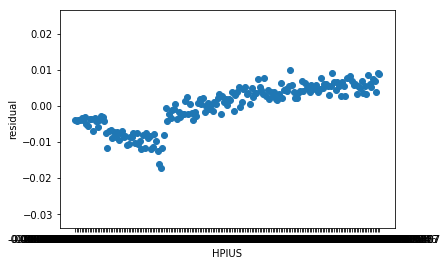

In [625]:
Y_pred = est.predict(X)
residual = df9["HPIUS"].values-Y_pred

plt.scatter(df9[["HPIUS"]],residual)
plt.xlabel("HPIUS") #X1 - a predictor")
plt.ylabel("residual")
plt.show()

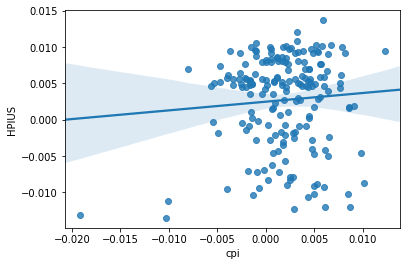

In [626]:
#sns.regplot(x="mortgrate", y="HPIUS", data=df9);
#sns.regplot(x="unemp", y="HPIUS", data=df9);
sns.regplot(x="cpi", y="HPIUS", data=df9);


In [627]:
#'unemp', 'cpi'

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


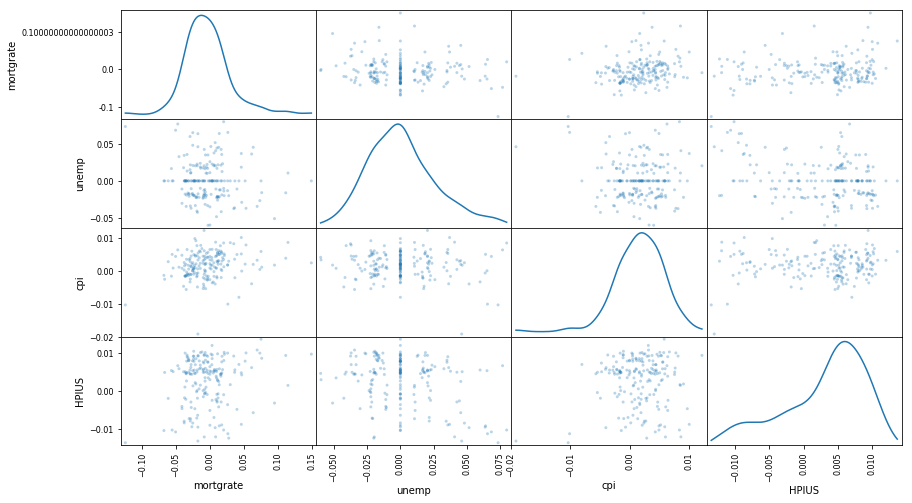

In [628]:
pd.scatter_matrix(df9[[ 'mortgrate', 'unemp', 'cpi', 'HPIUS']], alpha = 0.3, figsize = (14,8), diagonal = 'kde');


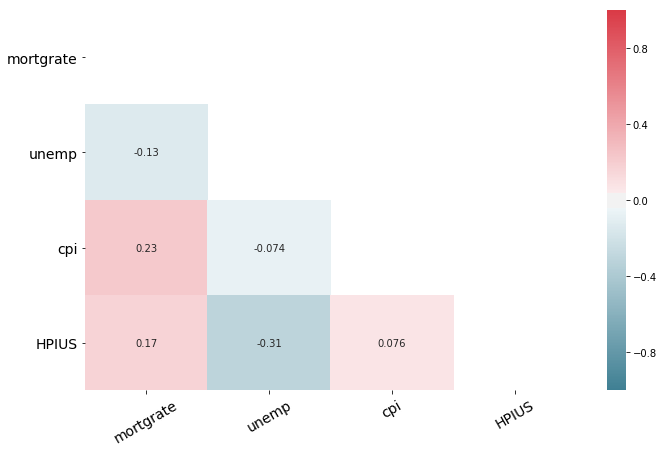

In [629]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

df_with_target = df9[[ 'mortgrate', 'unemp', 'cpi', 'HPIUS']].copy()
df_with_target['HPIUS'] = y
correlation_heat_map(df_with_target)

In [145]:
#popdata  = pd.read_pickle("mergeddfclean.p")

In [630]:
#df10.to_pickle('df10popmacro.p')
df10 = pd.read_pickle('df10popmacro.p')


In [631]:
df10.head()

,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,HPIUS,month,year,mortgrate,unemp,cpi
Year,,,,,,,,,,,,,,
2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,1,2011,0.010616,-0.021505,0.004763


In [635]:

q = df10["price"].quantile(0.95)
df10 = df10[df10["price"] < q]

q = df10["price"].quantile(0.05)
popdf  = df10[df10["price"] > q]

q = df10["HPIUS"].quantile(0.95)
df10 = df10[df10["HPIUS"] < q]

q = df10["HPIUS"].quantile(0.05)
popdf  = df10[df10["HPIUS"] > q]

#df11 = pd.DataFrame(df10.groupby(['county', 'year'])['price'].sum())
df11 = pd.DataFrame(df10.groupby(['county'])['price'].sum())

print (df11.sort_values(by=['price'], ascending=False).head())
print (df11.sort_values(by=['price'], ascending=False).tail())


#df.sort(['Peak', 'Weeks'], ascending=[True, False], inplace=True)


                   price
county                  
Howard TX       0.120495
Hancock WV      0.113197
Robeson NC      0.104775
Greene NC       0.102818
San Jacinto TX  0.097963
                  price
county                 
Calaveras CA  -0.429950
Otter Tail MN -0.433315
Grady GA      -0.436419
Wyandotte KS  -0.451405
Lyon NV       -0.462465


In [637]:
df112 = pd.DataFrame(df10.groupby(['county'])['HPIUS'].sum())

print (df112.sort_values(by=['HPIUS'], ascending=False).head())
print (df112.sort_values(by=['HPIUS'], ascending=False).tail())



                 HPIUS
county                
Jones IA      0.004977
Van Buren AR  0.004977
Haskell OK    0.004977
Luzerne PA    0.004977
Henry KY      0.004977
                    HPIUS
county                   
Pittsylvania VA -0.002834
Rio Grande CO   -0.002834
Butler MO       -0.002834
Hubbard MN      -0.002834
Fremont WY      -0.002834


In [638]:
#df10.to_pickle('df10popmacro.p')
df10 = pd.read_pickle('df10popmacro.p')

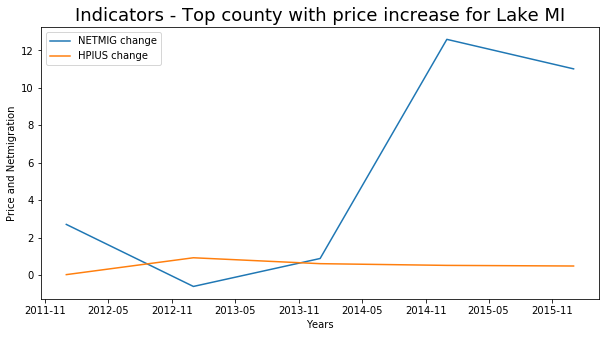

In [639]:
#df10[df10.county == 'Osceola FL'].price.plot()

df11 = df10.copy()
#print (df11)
#df11['price'] = df11['Price']*100
df11['HPIUS'] = df11['HPIUS'].apply(lambda x: x*100)

#df11[df11.county == 'Fort Bend TX'].price.plot()
#df11[df11.county == 'Fort Bend TX'].RNETMIG2016.plot()

county = 'Lake MI'	#'Fort Bend TX'

fig = plt.figure (figsize = (10,5))
ax = fig.add_subplot(111)

line = plt.plot(df11[df11.county == county].RNETMIG2016, ls='solid', label='NETMIG change')
line = plt.plot(df11[df11.county == county].HPIUS, ls='solid', label='HPIUS change')

plt.title('Indicators - Top county with price increase for '+ county, fontsize=18)

plt.xlabel('Years')
plt.ylabel('Price and Netmigration')

ax.legend(loc='best')
plt.show()



In [640]:
df10.columns

Index(['county', 'RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016',
       'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016', 'price',
       'HPIUS', 'month', 'year', 'mortgrate', 'unemp', 'cpi'],
      dtype='object')

In [641]:
import tensorflow as tf

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [642]:
#-------------------------Regresison--------------------------------------


In [734]:
df12 = df10.drop(['county', 'month','year','HPIUS'], 1)


df12 = df10.drop(['county', 'month','year'], 1)
lags = range(1, 5)  # Just two lags for demonstration.

df13 = df12.assign(**{
    '{} (t-{})'.format(col, t): df12[col].shift(t)
    for t in lags
    for col in df12
})


In [735]:
df13.columns
df13 = df13.dropna()

In [736]:
df13

,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,HPIUS,mortgrate,unemp,...,RNETMIG2016 (t-4),RNATURALINC2016 (t-4),RINTERNATIONALMIG2016 (t-4),RDOMESTICMIG2016 (t-4),RBIRTH2016 (t-4),price (t-4),HPIUS (t-4),mortgrate (t-4),unemp (t-4),cpi (t-4)
Year,,,,,,,,,,,,,,,,,,,,,
2011-01-01,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,0.010616,-0.021505,...,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,-0.002834,0.010616,-0.021505,...,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,-0.002834,0.010616,-0.021505,...,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,-0.002834,0.010616,-0.021505,...,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,-0.002834,0.010616,-0.021505,...,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,11.309054,-1.193043,1.056340,0.323116,-1.516159,12.365394,-0.104816,-0.002834,0.010616,-0.021505,...,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,9.355189,-9.574140,4.458643,1.154470,-10.728610,13.813832,-0.032852,-0.002834,0.010616,-0.021505,...,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,8.884545,2.518750,3.233022,0.426057,2.092692,12.117567,-0.058377,-0.002834,0.010616,-0.021505,...,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,11.497106,-2.978796,1.149711,0.052260,-3.031055,12.646817,-0.082685,-0.002834,0.010616,-0.021505,...,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,-0.002834,0.010616,-0.021505,0.004763


In [737]:
import statsmodels.api as sm
X = df13[['RDEATH2016', 'RNATURALINC2016', 'RINTERNATIONALMIG2016', 'RBIRTH2016', 'RNETMIG2016 (t-1)',
       'RNATURALINC2016 (t-1)', 'RINTERNATIONALMIG2016 (t-1)',
       'RDOMESTICMIG2016 (t-1)',  'price (t-1)',
       'mortgrate (t-1)', 'unemp (t-1)', 'cpi (t-1)',
       'RDEATH2016 (t-2)', 'RNETMIG2016 (t-2)',
       'RINTERNATIONALMIG2016 (t-2)', 'RDOMESTICMIG2016 (t-2)',
       'RBIRTH2016 (t-2)', 'price (t-2)', 'mortgrate (t-2)',
       'unemp (t-2)', 'cpi (t-2)', 'RDEATH2016 (t-3)', 'RNETMIG2016 (t-3)',
       'RNATURALINC2016 (t-3)', 'RBIRTH2016 (t-3)']]
y = df13['HPIUS']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HPIUS   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     835.4
Date:                Sun, 08 Apr 2018   Prob (F-statistic):               0.00
Time:                        16:58:20   Log-Likelihood:                 41658.
No. Observations:                8755   AIC:                        -8.326e+04
Df Residuals:                    8729   BIC:                        -8.308e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0029      0.000    -10.293      0.000      -0.003      -0.002
RDEATH2016                   2321.3405   5.82e+04      0.040      0.968   -1.12e+05    1.16e+05
RNATURALINC2016              2321.3404   5.82e+04      0.040      0.968   -1.12e+05    1.16e+05
RINTERNATIONALMIG2016        3.753e-05   1.55e-05      2.428      0.015    7.23e-06    6.78e-05
RBIRTH2016                  -2321.3404   5.82e+04     -0.040      0.968   -1.16e+05    1.12e+05
RNETMIG2016 (t-1)            1.251e+04   1.97e+04      0.636      0.525    -2.6e+04    5.11e+04
RNATURALINC2016 (t-1)       -4.399e-05   6.59e-06     -6.679      0.000   -5.69e-05   -3.11e-05
RINTERNATIONALMIG2016 (t-1) -1.251e+04   1.97e+04     -0.636      0.525   -5.11e+04     2.6e+04
RDOMESTICMIG2016 (t-1)      -1.251e+04   1.97e+04     -0.636      0.525   -5.11e+04     2.6e+04
price (t-1)                     0.0101      0.000     27.217      0.000       0.009       0.011
mortgrate (t-1)                -0.1791      0.129     -1.393      0.164      -0.431       0.073
unemp (t-1)                     0.3626      0.154      2.355      0.019       0.061       0.664
cpi (t-1)                       2.1745      1.158      1.879      0.060      -0.095       4.444
RDEATH2016 (t-2)             9.613e-05    1.1e-05      8.701      0.000    7.45e-05       0.000
RNETMIG2016 (t-2)            2293.1874   1.97e+04      0.116      0.907   -3.63e+04    4.09e+04
RINTERNATIONALMIG2016 (t-2) -2293.1873   1.97e+04     -0.116      0.907   -4.09e+04    3.63e+04
RDOMESTICMIG2016 (t-2)      -2293.1874   1.97e+04     -0.116      0.907   -4.09e+04    3.63e+04
RBIRTH2016 (t-2)             3.539e-06   1.09e-05      0.324      0.746   -1.78e-05    2.49e-05
price (t-2)                     0.0102      0.000     27.400      0.000       0.009       0.011
mortgrate (t-2)                -0.1067      0.129     -0.830      0.407      -0.359       0.145
unemp (t-2)                     0.0811      0.154      0.527      0.598      -0.221       0.383
cpi (t-2)                       0.5230      1.158      0.452      0.651      -1.746       2.792
RDEATH2016 (t-3)            -6550.9902   5.81e+04     -0.113      0.910   -1.21e+05    1.07e+05
RNETMIG2016 (t-3)            7.594e-06   2.61e-06      2.915      0.004    2.49e-06    1.27e-05
RNATURALINC2016 (t-3)       -6550.9903   5.81e+04     -0.113      0.910   -1.21e+05    1.07e+05
RBIRTH2016 (t-3)             6550.9903   5.81e+04      0.113      0.910   -1.07e+05    1.21e+05
==============================================================================
Omnibus:                      457.554   Durbin-Watson:                   0.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.903
Skew:                          -0.028   Prob(JB):             

In [738]:
df15 = df10.drop(['month','year'], 1)
df15.head()

,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,HPIUS,mortgrate,unemp,cpi
Year,,,,,,,,,,,,
2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,0.010616,-0.021505,0.004763


In [739]:
df15['state'] = df15['county'].str[-2:]

#df16 = df15.drop(['county'], 1)
df16 = df15.copy()

df_state = pd.get_dummies(df16['state'])
df_new = pd.concat([df16, df_state], axis=1)
df_new.head()


,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,HPIUS,mortgrate,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,
2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,-0.002834,0.010616,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,-0.002834,0.010616,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,0.010616,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,0.010616,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,0.010616,...,0,0,0,0,0,0,0,0,0,0


In [740]:
features = df_new.columns

print (features)

features = features.drop(['price','state','county'])

print (features)


Index(['county', 'RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016',
       'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016', 'price',
       'HPIUS', 'mortgrate', 'unemp', 'cpi', 'state', 'AL', 'AR', 'AZ', 'CA',
       'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')
Index(['RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016', 'RINTERNATIONALMIG2016',
       'RDOMESTICMIG2016', 'RBIRTH2016', 'HPIUS', 'mortgrate', 'unemp', 'cpi',
       'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT',
       'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV'

In [741]:
import statsmodels.api as sm
X = df_new[features.drop('HPIUS')]
y = df_new['HPIUS']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HPIUS   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     276.1
Date:                Sun, 08 Apr 2018   Prob (F-statistic):               0.00
Time:                        16:58:21   Log-Likelihood:                 40795.
No. Observations:                8759   AIC:                        -8.148e+04
Df Residuals:                    8702   BIC:                        -8.107e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0031      0.001     -3.048      0.002      -0.005      -0.001
RDEATH2016             1849.9194   6.45e+04      0.029      0.977   -1.25e+05    1.28e+05
RNETMIG2016            7933.2636   2.19e+04      0.363      0.717   -3.49e+04    5.08e+04
RNATURALINC2016        1849.9192   6.45e+04      0.029      0.977   -1.25e+05    1.28e+05
RINTERNATIONALMIG2016 -7933.2636   2.19e+04     -0.363      0.717   -5.08e+04    3.49e+04
RDOMESTICMIG2016      -7933.2636   2.19e+04     -0.363      0.717   -5.08e+04    3.49e+04
RBIRTH2016            -1849.9192   6.45e+04     -0.029      0.977   -1.28e+05    1.25e+05
mortgrate                -0.3439      0.005    -70.459      0.000      -0.353      -0.334
unemp                     0.5068      0.005     99.902      0.000       0.497       0.517
cpi                       3.0885      0.041     74.983      0.000       3.008       3.169
AL                       -0.0002      0.001     -0.170      0.865      -0.002       0.002
AR                       -0.0002      0.001     -0.179      0.858      -0.002       0.002
AZ                        0.0001      0.001      0.131      0.896      -0.002       0.002
CA                        0.0003      0.001      0.302      0.762      -0.002       0.002
CO                     2.977e-05      0.001      0.030      0.976      -0.002       0.002
CT                     8.389e-05      0.001      0.081      0.936      -0.002       0.002
DE                       -0.0004      0.001     -0.341      0.733      -0.003       0.002
FL                       -0.0005      0.001     -0.488      0.626      -0.002       0.001
GA                       6.8e-05      0.001      0.069      0.945      -0.002       0.002
HI                       -0.0001      0.001     -0.125      0.900      -0.002       0.002
IA                       -0.0001      0.001     -0.110      0.912      -0.002       0.002
ID                     7.118e-05      0.001      0.070      0.944      -0.002       0.002
IL                        0.0002      0.001      0.176      0.861      -0.002       0.002
IN                    -1.285e-05      0.001     -0.013      0.990      -0.002       0.002
KS                    -1.719e-06      0.001     -0.002      0.999      -0.002       0.002
KY                        0.0001      0.001      0.122      0.903      -0.002       0.002
MA                       -0.0002      0.001     -0.242      0.809      -0.002       0.002
MD                    -3.034e-05      0.001     -0.030      0.976      -0.002       0.002
ME                       -0.0002      0.001     -0.217      0.828      -0.002       0.002
MI                       -0.0002      0.001     -0.213      0.831      -0.002       0.002
MN                        0.0003      0.001      0.291      0.771      -0.002       0.002
MO                    -

In [742]:
df_new[features]

,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,HPIUS,mortgrate,unemp,cpi,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,
2011-01-01,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.002834,0.010616,-0.021505,0.004763,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.002834,0.010616,-0.021505,0.004763,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.002834,0.010616,-0.021505,0.004763,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.002834,0.010616,-0.021505,0.004763,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.002834,0.010616,-0.021505,0.004763,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.002834,0.010616,-0.021505,0.004763,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.002834,0.010616,-0.021505,0.004763,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.002834,0.010616,-0.021505,0.004763,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.002834,0.010616,-0.021505,0.004763,...,0,0,0,0,0,0,0,0,0,0


In [743]:
df_new

,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,HPIUS,mortgrate,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,
2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,-0.002834,0.010616,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,-0.002834,0.010616,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,0.010616,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,0.010616,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,0.010616,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Cherokee AL,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,-0.002834,0.010616,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Coffee AL,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,-0.002834,0.010616,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Colbert AL,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,-0.002834,0.010616,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Covington AL,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,-0.002834,0.010616,...,0,0,0,0,0,0,0,0,0,0


In [744]:
#features = df12.columns
#features = features.drop(['price','state','county'])
#= df10.drop(['county', 'month','year','HPIUS'], 1)


df12 = df10.copy() #drop(['county', 'month','year','HPIUS'], 1)
lags = range(1, 3)  # Just two lags for demonstration.

df17 = df12.assign(**{
    '{} (t-{})'.format(col, t): df12[col].shift(t)
    for t in lags
    for col in df12
})

df17

,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,HPIUS,month,...,RINTERNATIONALMIG2016 (t-2),RDOMESTICMIG2016 (t-2),RBIRTH2016 (t-2),price (t-2),HPIUS (t-2),month (t-2),year (t-2),mortgrate (t-2),unemp (t-2),cpi (t-2)
Year,,,,,,,,,,,,,,,,,,,,,
2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,-0.002834,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,-0.002834,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,1,...,0.327282,5.836523,11.563952,-0.024568,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,1,...,0.989585,14.768069,11.831760,-0.093731,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,1,...,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
2011-01-01,Cherokee AL,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,-0.002834,1,...,-0.052136,1.807391,12.929798,-0.086218,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
2011-01-01,Coffee AL,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,-0.002834,1,...,0.910332,-2.496072,11.775588,-0.194399,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
2011-01-01,Colbert AL,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,-0.002834,1,...,0.076849,6.109510,8.491835,-0.148970,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
2011-01-01,Covington AL,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,-0.002834,1,...,1.728471,0.993374,13.490022,-0.076972,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763


In [745]:
#df18 = pd.merge(df_new, df17, left_on=['Year','county'],right_on=['Year','county'], left_index=True, right_index=True) 


df18 = pd.merge(df_new.reset_index(), df17.reset_index(), on=['Year','county'], how='outer', suffixes=('', '_y')) 

#df18 = df_new.join(df17, on=['Year','county'])

df18
#df9 = pd.merge(HPIUS, df8, left_on=['month', 'year'],right_on=['month', 'year'])


,Year,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,HPIUS,...,RINTERNATIONALMIG2016 (t-2),RDOMESTICMIG2016 (t-2),RBIRTH2016 (t-2),price (t-2),HPIUS (t-2),month (t-2),year (t-2),mortgrate (t-2),unemp (t-2),cpi (t-2)
0,2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,-0.002834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,-0.002834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,...,0.327282,5.836523,11.563952,-0.024568,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
3,2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,...,0.989585,14.768069,11.831760,-0.093731,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
4,2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,...,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
5,2011-01-01,Cherokee AL,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,-0.002834,...,-0.052136,1.807391,12.929798,-0.086218,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
6,2011-01-01,Coffee AL,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,-0.002834,...,0.910332,-2.496072,11.775588,-0.194399,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
7,2011-01-01,Colbert AL,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,-0.002834,...,0.076849,6.109510,8.491835,-0.148970,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
8,2011-01-01,Covington AL,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,-0.002834,...,1.728471,0.993374,13.490022,-0.076972,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
9,2011-01-01,Cullman AL,11.309054,-1.193043,1.056340,0.323116,-1.516159,12.365394,-0.104816,-0.002834,...,0.568907,0.146815,11.084501,-0.017720,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763


In [746]:
df18.columns

Index(['Year', 'county', 'RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016',
       'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016', 'price',
       'HPIUS',
       ...
       'RINTERNATIONALMIG2016 (t-2)', 'RDOMESTICMIG2016 (t-2)',
       'RBIRTH2016 (t-2)', 'price (t-2)', 'HPIUS (t-2)', 'month (t-2)',
       'year (t-2)', 'mortgrate (t-2)', 'unemp (t-2)', 'cpi (t-2)'],
      dtype='object', length=103)

In [747]:
df18.set_index('Year', inplace=True)



In [784]:
impo
print (features)

features = features.drop(['price','state','county', 'year', 'month', 'RNETMIG2016'])

print (features)



Index(['county', 'RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016',
       'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016', 'price',
       'HPIUS', 'mortgrate',
       ...
       'RINTERNATIONALMIG2016 (t-2)', 'RDOMESTICMIG2016 (t-2)',
       'RBIRTH2016 (t-2)', 'price (t-2)', 'HPIUS (t-2)', 'month (t-2)',
       'year (t-2)', 'mortgrate (t-2)', 'unemp (t-2)', 'cpi (t-2)'],
      dtype='object', length=102)
Index(['RDEATH2016', 'RNATURALINC2016', 'RINTERNATIONALMIG2016',
       'RDOMESTICMIG2016', 'RBIRTH2016', 'HPIUS', 'mortgrate', 'unemp', 'cpi',
       'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT',
       'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY',
       'RDEATH2016_y', 'RNETMIG2016_y', 'RNATURALINC2016_y',
       'RINTERNATIONALMIG2016_y', 'RDOMESTICMIG2016_y', 'RBI

In [785]:
features = [x for x in features if "_y" not in x]
#features = [x for x in features if "price" not in x]
features = [x for x in features if "month" not in x]
features = [x for x in features if "year" not in x]
#features = [x for x in features if "HPIUS" not in x]
features = [x for x in features if "county" not in x]


#features

In [786]:
df18=  df18.dropna() #['price']
df18[features]

,RDEATH2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,HPIUS,mortgrate,unemp,cpi,AL,...,RNETMIG2016 (t-2),RNATURALINC2016 (t-2),RINTERNATIONALMIG2016 (t-2),RDOMESTICMIG2016 (t-2),RBIRTH2016 (t-2),price (t-2),HPIUS (t-2),mortgrate (t-2),unemp (t-2),cpi (t-2)
Year,,,,,,,,,,,,,,,,,,,,,
2011-01-01,11.632586,0.621868,-0.146322,-1.133994,12.254454,-0.002834,0.010616,-0.021505,0.004763,1,...,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,9.871136,3.058662,-0.052136,1.807391,12.929798,-0.002834,0.010616,-0.021505,0.004763,1,...,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,12.950211,-1.174622,0.910332,-2.496072,11.775588,-0.002834,0.010616,-0.021505,0.004763,1,...,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,11.911623,-3.419789,0.076849,6.109510,8.491835,-0.002834,0.010616,-0.021505,0.004763,1,...,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,10.092682,3.397340,1.728471,0.993374,13.490022,-0.002834,0.010616,-0.021505,0.004763,1,...,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,12.314073,-1.229572,0.568907,0.146815,11.084501,-0.002834,0.010616,-0.021505,0.004763,1,...,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,12.890980,-0.685410,0.184533,6.748652,12.205570,-0.002834,0.010616,-0.021505,0.004763,1,...,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,11.309054,1.056340,0.323116,-1.516159,12.365394,-0.002834,0.010616,-0.021505,0.004763,1,...,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,9.355189,4.458643,1.154470,-10.728610,13.813832,-0.002834,0.010616,-0.021505,0.004763,1,...,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,-0.002834,0.010616,-0.021505,0.004763


In [787]:
#df18.dtypes

mylist = list(df18[features].select_dtypes(include=['object']).columns)
mylist

#features = features.drop(mylist)



[]

In [788]:
features

['RDEATH2016',
 'RNATURALINC2016',
 'RINTERNATIONALMIG2016',
 'RDOMESTICMIG2016',
 'RBIRTH2016',
 'HPIUS',
 'mortgrate',
 'unemp',
 'cpi',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY',
 'RDEATH2016 (t-1)',
 'RNETMIG2016 (t-1)',
 'RNATURALINC2016 (t-1)',
 'RINTERNATIONALMIG2016 (t-1)',
 'RDOMESTICMIG2016 (t-1)',
 'RBIRTH2016 (t-1)',
 'price (t-1)',
 'HPIUS (t-1)',
 'mortgrate (t-1)',
 'unemp (t-1)',
 'cpi (t-1)',
 'RDEATH2016 (t-2)',
 'RNETMIG2016 (t-2)',
 'RNATURALINC2016 (t-2)',
 'RINTERNATIONALMIG2016 (t-2)',
 'RDOMESTICMIG2016 (t-2)',
 'RBIRTH2016 (t-2)',
 'price (t-2)',
 'HPIUS (t-2)',
 'mortgrate (t-2)',
 'unemp (t-2)',
 'cpi (t-2)']

In [789]:
df18[['HPIUS', 'HPIUS (t-1)']]

,HPIUS,HPIUS (t-1)
Year,,
2011-01-01,-0.002834,-0.002834
2011-01-01,-0.002834,-0.002834
2011-01-01,-0.002834,-0.002834
2011-01-01,-0.002834,-0.002834
2011-01-01,-0.002834,-0.002834
2011-01-01,-0.002834,-0.002834
2011-01-01,-0.002834,-0.002834
2011-01-01,-0.002834,-0.002834
2011-01-01,-0.002834,-0.002834


In [790]:
import statsmodels.api as sm

#features = features.drop('RNETMIG2016')


X = df18[features]
y = df18['price']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()


est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     40.02
Date:                Sun, 08 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:07:40   Log-Likelihood:                 12699.
No. Observations:                8757   AIC:                        -2.524e+04
Df Residuals:                    8678   BIC:                        -2.468e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.5705      0.409      1.395      0.163      -0.231       1.372
RDEATH2016                  -2.328e+06    1.6e+06     -1.456      0.146   -5.46e+06    8.07e+05
RNATURALINC2016             -2.328e+06    1.6e+06     -1.456      0.146   -5.46e+06    8.07e+05
RINTERNATIONALMIG2016           0.0010      0.000      2.143      0.032    8.43e-05       0.002
RDOMESTICMIG2016                0.0010   7.62e-05     12.568      0.000       0.001       0.001
RBIRTH2016                   2.328e+06    1.6e+06      1.456      0.146   -8.07e+05    5.46e+06
HPIUS                          10.3814     13.788      0.753      0.452     -16.646      37.409
mortgrate                      -0.7093      4.449     -0.159      0.873      -9.431       8.012
unemp                           0.5920      7.365      0.080      0.936     -13.846      15.029
cpi                             2.0730     49.122      0.042      0.966     -94.217      98.363
AL                             -0.5927      0.409     -1.450      0.147      -1.394       0.208
AR                             -0.5857      0.409     -1.433      0.152      -1.387       0.215
AZ                             -0.5985      0.409     -1.464      0.143      -1.400       0.203
CA                             -0.5826      0.409     -1.425      0.154      -1.384       0.219
CO                             -0.5952      0.409     -1.456      0.145      -1.396       0.206
CT                             -0.5972      0.409     -1.461      0.144      -1.399       0.204
DE                             -0.6056      0.409     -1.481      0.139      -1.407       0.196
FL                             -0.5982      0.409     -1.463      0.143      -1.399       0.203
GA                             -0.6036      0.409     -1.477      0.140      -1.405       0.198
HI                             -0.5746      0.409     -1.405      0.160      -1.376       0.227
IA                             -0.5903      0.409     -1.445      0.149      -1.391       0.211
ID                             -0.5999      0.409     -1.468      0.142      -1.401       0.201
IL                             -0.5895      0.409     -1.442      0.149      -1.391       0.212
IN                             -0.5926      0.409     -1.450      0.147      -1.394       0.209
KS                             -0.5885      0.409     -1.440      0.150      -1.390       0.213
KY                             -0.5904      0.409     -1.445      0.149      -1.392       0.211
MA                             -0.5817      0.409     -1.423      0.155      -1.383       0.220
MD                             -0.6004      0.409     -1.469      0.142      -1.402       0.201
ME                             -0.5735      0.409     -1.403      0.161      -1.375       0.228
MI         

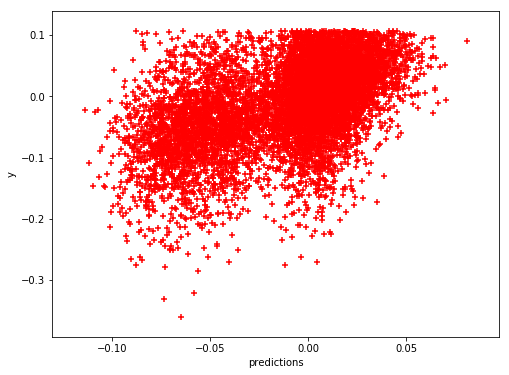

In [791]:
model = sm.OLS(y, X)
model = model.fit()
predictions = est.predict(X)
# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("predictions")
plt.ylabel("y")
plt.show()



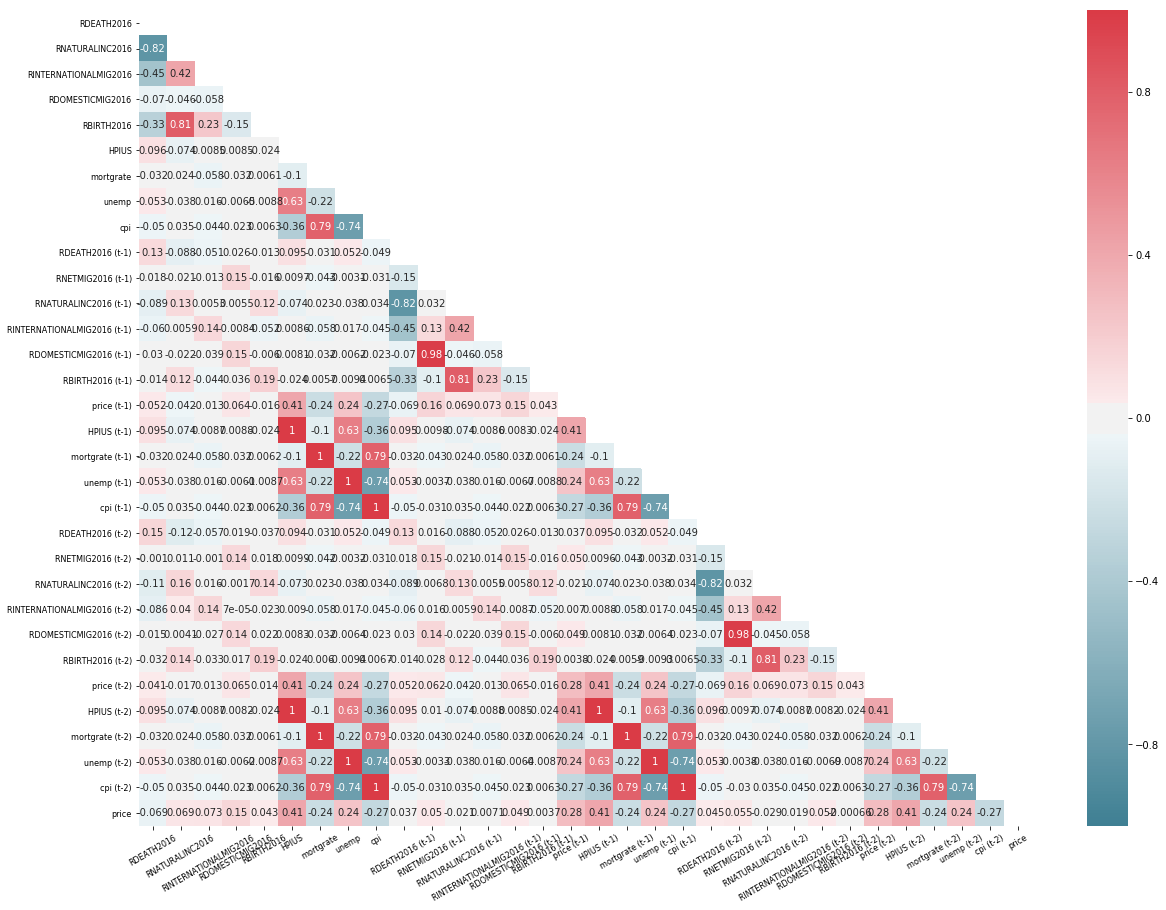

In [796]:
featuresforhm = [x for x in features if len(x) != 2]
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(20,15))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=8, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

df_with_target = df18[featuresforhm+['price']].copy()
df18['price'] = y
correlation_heat_map(df_with_target)

In [797]:
features

['RDEATH2016',
 'RNATURALINC2016',
 'RINTERNATIONALMIG2016',
 'RDOMESTICMIG2016',
 'RBIRTH2016',
 'HPIUS',
 'mortgrate',
 'unemp',
 'cpi',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY',
 'RDEATH2016 (t-1)',
 'RNETMIG2016 (t-1)',
 'RNATURALINC2016 (t-1)',
 'RINTERNATIONALMIG2016 (t-1)',
 'RDOMESTICMIG2016 (t-1)',
 'RBIRTH2016 (t-1)',
 'price (t-1)',
 'HPIUS (t-1)',
 'mortgrate (t-1)',
 'unemp (t-1)',
 'cpi (t-1)',
 'RDEATH2016 (t-2)',
 'RNETMIG2016 (t-2)',
 'RNATURALINC2016 (t-2)',
 'RINTERNATIONALMIG2016 (t-2)',
 'RDOMESTICMIG2016 (t-2)',
 'RBIRTH2016 (t-2)',
 'price (t-2)',
 'HPIUS (t-2)',
 'mortgrate (t-2)',
 'unemp (t-2)',
 'cpi (t-2)']

In [798]:
f

epoch 1 0.536272 0.53339666
epoch 101 0.021970289 0.021191664
epoch 201 0.019688183 0.018980967
epoch 301 0.019070901 0.018405093
epoch 401 0.01891387 0.018253256
epoch 501 0.018837824 0.01817573
epoch 601 0.018797569 0.018132763
epoch 701 0.018774206 0.01810673
epoch 801 0.018759089 0.018089285
epoch 901 0.018748323 0.01807644


0.8679501778840077

In [799]:
metrics.r2_score(y_test, pred)

0.8679501778840077

In [609]:
df10

,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,HPIUS,month,year,mortgrate,unemp,cpi
Year,,,,,,,,,,,,,,
2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Cherokee AL,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Coffee AL,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Colbert AL,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Covington AL,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,-0.002834,1,2011,0.010616,-0.021505,0.004763


In [722]:
df10

,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,HPIUS,month,year,mortgrate,unemp,cpi
Year,,,,,,,,,,,,,,
2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Cherokee AL,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Coffee AL,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Colbert AL,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Covington AL,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,-0.002834,1,2011,0.010616,-0.021505,0.004763


In [764]:
df18[features]

,RDEATH2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,mortgrate,unemp,cpi,AL,AR,...,cpi (t-1),RDEATH2016 (t-2),RNETMIG2016 (t-2),RNATURALINC2016 (t-2),RINTERNATIONALMIG2016 (t-2),RDOMESTICMIG2016 (t-2),RBIRTH2016 (t-2),mortgrate (t-2),unemp (t-2),cpi (t-2)
Year,,,,,,,,,,,,,,,,,,,,,
2011-01-01,11.632586,0.621868,-0.146322,-1.133994,12.254454,0.010616,-0.021505,0.004763,1,0,...,0.004763,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,0.010616,-0.021505,0.004763
2011-01-01,9.871136,3.058662,-0.052136,1.807391,12.929798,0.010616,-0.021505,0.004763,1,0,...,0.004763,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,0.010616,-0.021505,0.004763
2011-01-01,12.950211,-1.174622,0.910332,-2.496072,11.775588,0.010616,-0.021505,0.004763,1,0,...,0.004763,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,0.010616,-0.021505,0.004763
2011-01-01,11.911623,-3.419789,0.076849,6.109510,8.491835,0.010616,-0.021505,0.004763,1,0,...,0.004763,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,0.010616,-0.021505,0.004763
2011-01-01,10.092682,3.397340,1.728471,0.993374,13.490022,0.010616,-0.021505,0.004763,1,0,...,0.004763,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,0.010616,-0.021505,0.004763
2011-01-01,12.314073,-1.229572,0.568907,0.146815,11.084501,0.010616,-0.021505,0.004763,1,0,...,0.004763,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,0.010616,-0.021505,0.004763
2011-01-01,12.890980,-0.685410,0.184533,6.748652,12.205570,0.010616,-0.021505,0.004763,1,0,...,0.004763,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,0.010616,-0.021505,0.004763
2011-01-01,11.309054,1.056340,0.323116,-1.516159,12.365394,0.010616,-0.021505,0.004763,1,0,...,0.004763,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,0.010616,-0.021505,0.004763
2011-01-01,9.355189,4.458643,1.154470,-10.728610,13.813832,0.010616,-0.021505,0.004763,1,0,...,0.004763,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,0.010616,-0.021505,0.004763


In [724]:
#features.append('price')
df18.to_pickle('df18.p')

In [800]:
df18[features+['price']].to_pickle('df18featuresy.p')